# Hospital Data Analysis

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from numpy.random import randn
np.random.seed(123)
missing_values =["s"]

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/niteen11/DataAnalyticsAcademy/master/Python/dataset_diabetes/diabetic_data.csv',na_values = missing_values)

In [3]:
drop_cols = ['weight','admission_type_id','discharge_disposition_id','admission_source_id','encounter_id','payer_code','medical_specialty','diag_1','diag_2','diag_3','number_diagnoses','A1Cresult','metformin','repaglinide','nateglinide','chlorpropamide','max_glu_serum','glimepiride','acetohexamide','glipizide','glyburide','tolbutamide','pioglitazone','rosiglitazone','acarbose','miglitol','troglitazone','tolazamide','examide','citoglipton','insulin','glyburide-metformin','glipizide-metformin','glimepiride-pioglitazone','metformin-rosiglitazone','metformin-pioglitazone','change','diabetesMed']
df.drop(drop_cols,inplace=True,axis=1)

In [4]:
df=df.rename(columns={'patient_nbr':'ID','race':'Race','gender':'Sex','time_in_hospital':'Days','readmitted':'Readmitted','num_lab_procedures':'Lab Procedures','num_procedures':'Procedures','num_medications':'Medications','number_outpatient':'Outpatient','number_emergency':'Emergency','number_inpatient':'Inpatient','age':'Age'})

In [5]:
df

,ID,Race,Sex,Age,Days,Lab Procedures,Procedures,Medications,Outpatient,Emergency,Inpatient,Readmitted
0,8222157,Caucasian,Female,[0-10),1,41,0,1,0,0,0,NO
1,55629189,Caucasian,Female,[10-20),3,59,0,18,0,0,0,>30
2,86047875,AfricanAmerican,Female,[20-30),2,11,5,13,2,0,1,NO
3,82442376,Caucasian,Male,[30-40),2,44,1,16,0,0,0,NO
4,42519267,Caucasian,Male,[40-50),1,51,0,8,0,0,0,NO
...,...,...,...,...,...,...,...,...,...,...,...,...
101761,100162476,AfricanAmerican,Male,[70-80),3,51,0,16,0,0,0,>30
101762,74694222,AfricanAmerican,Female,[80-90),5,33,3,18,0,0,1,NO
101763,41088789,Caucasian,Male,[70-80),1,53,0,9,1,0,0,NO
101764,31693671,Caucasian,Female,[80-90),10,45,2,21,0,0,1,NO


# Average Hospital Days By Sex

In [6]:
# Grouping data by sex and days to get the average total
df.groupby(['Sex'])['Days'].mean()

Sex
Female             4.478797
Male               4.299777
Unknown/Invalid    3.333333
Name: Days, dtype: float64

<AxesSubplot:xlabel='Sex', ylabel='Days'>

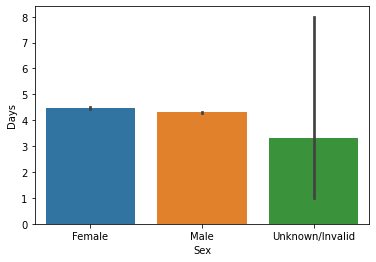

In [7]:
# Barplot showing days average by sex
sns.barplot(x='Sex', y='Days', data=df)

<AxesSubplot:xlabel='Days', ylabel='Readmitted'>

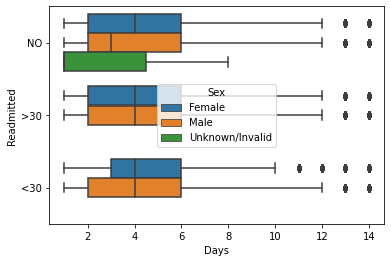

In [8]:
# Barplot showing days vs readmitted by sex
sns.boxplot(x='Days', y='Readmitted', data=df, hue='Sex')

# Total Hospital Days By Race

In [9]:
# Filtering of Data
df2=df[['Race','Sex','Days','Readmitted', 'Age']]

In [10]:
df2

,Race,Sex,Days,Readmitted,Age
0,Caucasian,Female,1,NO,[0-10)
1,Caucasian,Female,3,>30,[10-20)
2,AfricanAmerican,Female,2,NO,[20-30)
3,Caucasian,Male,2,NO,[30-40)
4,Caucasian,Male,1,NO,[40-50)
...,...,...,...,...,...
101761,AfricanAmerican,Male,3,>30,[70-80)
101762,AfricanAmerican,Female,5,NO,[80-90)
101763,Caucasian,Male,1,NO,[70-80)
101764,Caucasian,Female,10,NO,[80-90)


<AxesSubplot:xlabel='Readmitted', ylabel='Days'>

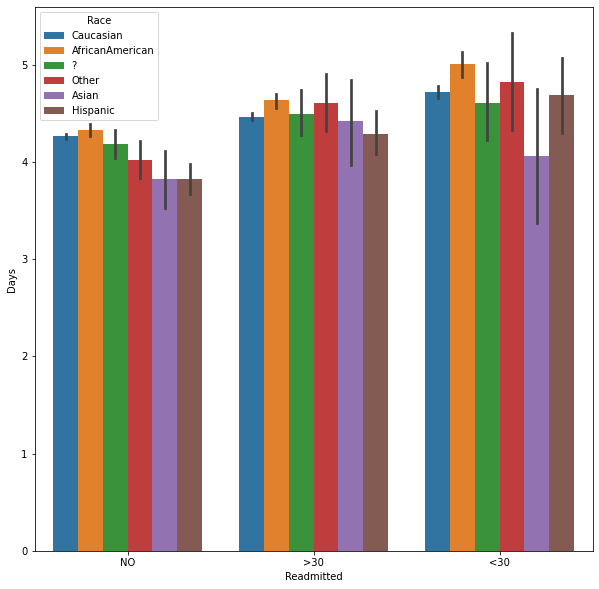

In [11]:
# Barplot with readmitted days by race
plt.figure(figsize=[10,10])
sns.barplot(x='Readmitted', y='Days',hue='Race',data = df2)

<AxesSubplot:xlabel='Race', ylabel='Days'>

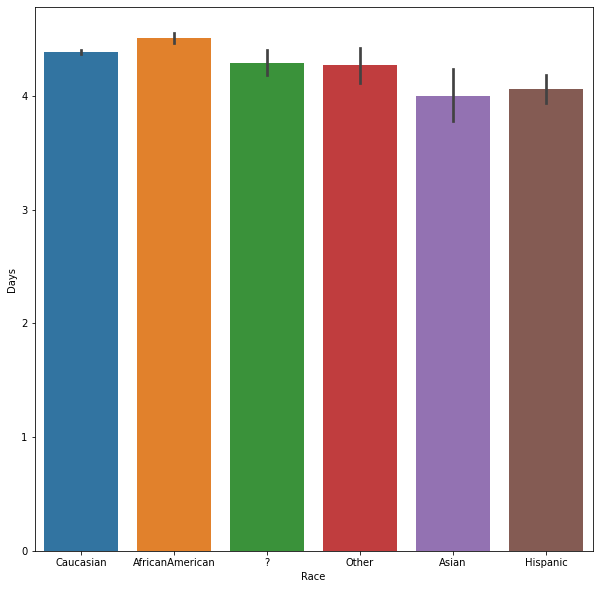

In [12]:
# Barplot with days by race
plt.figure(figsize=[10,10])
sns.barplot(x='Race', y='Days',data = df2)

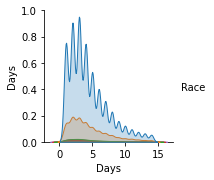

In [13]:
# Pairplot with days by race
sns.pairplot(df2, hue='Race')